In [15]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [16]:
class NeuralNetwork:

    # INITIALIZE neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #  set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        #   w11 w22
        #   w12 w22 

        # Initial random weights simple approach
        # self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        # self.wih = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)
        # more sophisticated initial weights based off the std of the size of the network
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # Learning rate
        self.lr = learningrate

        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
    
    # TRAIN the neural network
    def train(self, input_list, target_list):

        # convert inputs lst to 2d array
        inputs = numpy.array(input_list, ndmin=2).T
        targets = numpy.array(target_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # claculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emering form final output layer
        final_outputs = self.activation_function(final_inputs)

        # ERRORS 
        # error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # UPDATE WEIGHTS
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot(
            (output_errors * final_outputs * (1.0 - final_outputs)), 
            numpy.transpose(hidden_outputs)
            )
        # updates the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot(
            (hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), 
            numpy.transpose(inputs)
            ) 

    # QUERY the neural network
    def query(self, inputs_list):
        #INPUTS
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T 

        # HIDDEN LAYER
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # OUTPUT LAYER
        # calculate the signals into the final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs
        

In [17]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# best learning rate is 0.2
learning_rate = 0.2

#  create instance of neural network
n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [18]:
# load the mnits training data CSV file into a list
# training_data_file = open("data/mnist_train_100.csv", "r")
training_data_file = open("data/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

# Skip the header row (the first element in the list)
# Check if the list is not empty before attempting to skip
if len(training_data_list) > 0:
    training_data_list = training_data_list[1:]

In [19]:
# train the neural network

# epochs is the numbr of times the training data set is used for training
epochs = 10


for e in range(epochs):
    # go through all records in the training dataset
    for record in training_data_list:
        # split the record by the "," commans
        all_values = record.split(",")
    
        # scale and shift the inputs
        input_values = numpy.asarray(all_values[1:]).astype(numpy.float32)
        inputs = (input_values/255.0 *0.99) +0.01
    
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) +0.01
    
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
    pass



In [20]:
# load the mnist test data CSV file into a list
# test_data_file = open("data/mnist_test_10.csv", "r")
test_data_file = open("data/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

# Skip the header row (the first element in the list)
# Check if the list is not empty before attempting to skip
if len(test_data_list) > 0:
    test_data_list = test_data_list[1:]

In [21]:
# get the first test record
all_test_values = test_data_list[0].split(",")
# print the label
print(all_test_values[0])


7


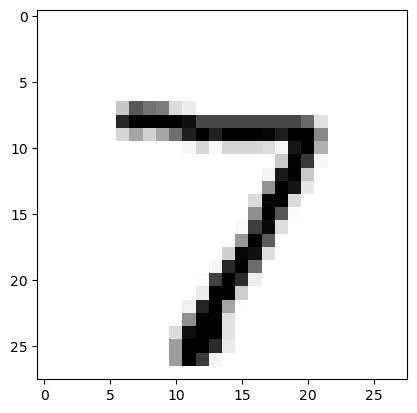

In [22]:
test_image_array = numpy.asarray(all_test_values[1:]).reshape((28, 28))
test_image_array = test_image_array.astype(numpy.float32)
matplotlib.pyplot.imshow(test_image_array, cmap="Greys", interpolation="None")
matplotlib.pyplot.show()

In [23]:

all_test_values_1 = numpy.asarray(all_test_values[1:]).astype(numpy.float32)


scaled_test_input = (all_test_values_1 / 255.0 * 0.99) + 0.01

# predict
n.query(scaled_test_input)


array([[3.64155796e-04],
       [7.45910321e-03],
       [3.32301275e-03],
       [2.43738952e-03],
       [4.81962752e-04],
       [4.21899399e-03],
       [3.59004446e-03],
       [9.97126674e-01],
       [1.05407237e-03],
       [6.84221075e-04]])

In [24]:
# test neural network

# scorecard for how well the network performs, initially empty 

scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the "," commas
    all_values = record.split(",")
    # correct answer is first value
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    # scale and shift the inputs
    input = numpy.asarray(all_values[1:]).astype(numpy.float32)
    inputs = (input /255.00 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    #  the index of the highest value corresponds to the label 
    label = numpy.argmax(outputs)
    print(label, "networks answer")
    # append correct or incorrect to list
    if(label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # networks answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        


7 correct label
7 networks answer
2 correct label
2 networks answer
1 correct label
1 networks answer
0 correct label
0 networks answer
4 correct label
4 networks answer
1 correct label
1 networks answer
4 correct label
4 networks answer
9 correct label
9 networks answer
5 correct label
5 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
6 correct label
6 networks answer
9 correct label
9 networks answer
0 correct label
0 networks answer
1 correct label
1 networks answer
5 correct label
5 networks answer
9 correct label
9 networks answer
7 correct label
7 networks answer
3 correct label
3 networks answer
4 correct label
4 networks answer
9 correct label
9 networks answer
6 correct label
6 networks answer
6 correct label
6 networks answer
5 correct label
5 networks answer
4 correct label
4 networks answer
0 correct label
0 networks answer
7 correct label
7 networks answer
4 correct label
4 networks answer
0 correct label
0 networks answer
1 correct labe

In [25]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [26]:
# # calculate the performance score, the fraction of correct answers 
# scorecard_array = numpy.asarray(scorecard)
# print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9616


In [ ]:
# TODO: run for different learning rates, and for different epoch sizes, to see the different results 
# TODO: run for different hidden layer sizes to see the learning capacity [3:300]
